In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

In [28]:
class Env:
    def __init__(self):
        self.troll = 0.02
        self.num = 100
        self.len = 2000
        self.interval = 250
        self.safe_dis = 5
        self.speedMax = 3
        
    def carSpeed(self, car_data):
        for i in range(car_num-1):
            dis = car_data[i][0] - car_data[i+1][0]
            if dis > self.safe_dis :
                if car_data[i][1] < self.speedMax :
                    car_data[i][1] += 1
                else : 
                    pass
            elif dis == self.safe_dis :
                if car_data[i][1] < car_data[i+1] :
                    car_data[i][1] += 1
                elif car_data[i][1] > car_data[i][1] :
                    car_data[i][1] -= 1    
            elif dis == 0 :
                car_data[i][1] = 0
            else :
                if car_data[i][1] > car_data[i+1][1] :
                    car_data[i][1] -= 1
                elif car_data[i][1] < car_data[i+1][1] :
                    car_data[i][1] += 1

            if randint(1,1000) <= self.troll * 1000 :
                car_data[i][1] = 1

    def carMove(self, car_data) :
        for i in range(car_num) :
            car_data[i][1] += car_data[i][0]
            
    def tLight() :
        pass
    
    def reward(self, car_data) :
        R = 0
        for i in range(self.num) :
            if car_data[i][1] == 3 : 
                R += 1
            elif car_data[i][1] == 2 : 
                pass
            elif car_data[i][1] == 1 :
                R -= 1
            elif car_data[i][1] == 0 :
                R -= 4
                
        return R

In [29]:
def animate(i) :
    loc, speed = [], []
    for i in range(len(car_data)) :
        loc.append(car_data[i][0])
        speed.append(3 - car_data[i][1])
        
    graph.clear()
    graph.append(loc, speed)

Traceback (most recent call last):
  File "C:\Users\ICARUS\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\ICARUS\Anaconda3\lib\site-packages\matplotlib\animation.py", line 951, in _start
    self._init_draw()
  File "C:\Users\ICARUS\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Users\ICARUS\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-29-de82a32eefa6>", line 8, in animate
    graph.append(loc, speed)
AttributeError: 'AxesSubplot' object has no attribute 'append'


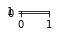

In [31]:
car_data = [[0,0]*car_num]           #인덱스가 작을수록 앞에 있는 차, [위치, 속도]
R = 0

fig = plt.figure()
graph = fig.add_subplot(100, 10, 1)

ani = animation.FuncAnimation(fig, animate, interval = 1000)
plt.show()